In [ ]:
# -*- coding: utf-8 -*-

"""
Created on Tue Feb 11 09:25:53 2025

@author: JVJ
"""

#%load_ext autoreload
#%autoreload 2

from WealthIncomeMPModel import WealthIncomeModelClass
import numpy as np
import sympy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({
    "axes.grid": True,
    "grid.color": "black",
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "font.size": 14                    # Set font size
})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from EconDLSolvers import choose_gpu
import torch, gc
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

torch.cuda.empty_cache()

# Hyperparameters
device = choose_gpu()
model_DL = {}

# DeepSimulate
K_time = 180
#model_DL[r'DeepSimulate: $\beta\in (0.95, 0.99)$'] = WealthIncomeModelClass(algoname='DeepSimulate', par={'Nstates_fixed': 1, 'bequest': 1}, device=device,train={'K_time': K_time})

#model_DL[r'DeepSimulate: $\beta\in (0.95, 0.99)$'].train.K_time *= 3
#model_DL[r'DeepSimulate: $\beta\in (0.95, 0.99)$'].solve(do_print=True)
#model_DL[r'DeepSimulate: $\beta\in (0.95, 0.99)$'].save('DeepSimulate_hetero_beta.pkl')

#model_DL[r'DeepSimulate: $\beta = 0.99$'] = WealthIncomeModelClass(algoname='DeepSimulate', par={'beta': 0.99,'Nstates_fixed': 0, 'bequest': 1},device=device,train={'K_time': K_time})
#model_DL[r'DeepSimulate: $\beta = 0.99$'].solve(do_print=True)
#model_DL[r'DeepSimulate: $\beta = 0.99$'].save('DeepSimulate_patient_beta.pkl')

#model_DL[r'DeepSimulate: $\beta = 0.95$'] = WealthIncomeModelClass(algoname='DeepSimulate',par={'beta': 0.95,'Nstates_fixed': 0, 'bequest': 1}, device=device,train={'K_time': K_time})
#model_DL[r'DeepSimulate: $\beta = 0.95$'].solve(do_print=True)
#model_DL[r'DeepSimulate: $\beta = 0.95$'].save('DeepSimulate_impatient_beta.pkl')

## DeepVPD
#model_DL[r'DeepVPD: $\beta\in (0.95, 0.99)$'] = WealthIncomeModelClass(algoname='DeepVPD',  par={'Nstates_fixed': 1, 'bequest': 1},device=device,train={'K_time': K_time})
#model_DL[r'DeepVPD: $\beta\in (0.95, 0.99)$'].solve(do_print=True)
#model_DL[r'DeepVPD: $\beta\in (0.95, 0.99)$'].save('DeepVPD_hetero_beta.pkl')
#
#model_DL[r'DeepVPD: $\beta = 0.99$'] = WealthIncomeModelClass(algoname='DeepVPD', par={'beta': 0.99,'Nstates_fixed': 0, 'bequest': 1},device=device,train={'K_time': K_time})
#model_DL[r'DeepVPD: $\beta = 0.99$'].solve(do_print=True)
#model_DL[r'DeepVPD: $\beta = 0.99$'].save('DeepVPD_patient_beta.pkl')
#
#model_DL[r'DeepVPD: $\beta = 0.95$'] = WealthIncomeModelClass(algoname='DeepVPD',par={'beta': 0.95,'Nstates_fixed': 0, 'bequest': 1}, device=device,train={'K_time': K_time})
#model_DL[r'DeepVPD: $\beta = 0.95$'].solve(do_print=True)
#model_DL[r'DeepVPD: $\beta = 0.95$'].save('DeepVPD_impatient_beta.pkl')

# DeepFOC
#model_DL[r'DeepFOC: $\beta\in (0.95, 0.99)$'] = WealthIncomeModelClass(algoname='DeepFOC', par={'Nstates_fixed': 1, 'KKT': True, 'bequest':1}, device=device,train={'K_time': K_time})
#model_DL[r'DeepFOC: $\beta\in (0.95, 0.99)$'].solve(do_print=True)

#TEST
model_DL[r'DeepSimulate Test: $\beta = 0.99$'] = WealthIncomeModelClass(
    algoname='DeepSimulate',
    par={
        'beta': 0.99,
        'Nstates_fixed': 0,
        'bequest': 1,
        'sigma_m0': 1.6921,
        'mu_m0': 5.8805,
        'sigma_a0': 1.6282,
        'mu_a0': 5.6854,
        'sigma_d0': 6.3801,
        'mu_d0': -14.2234
    },
    device=device,
    train={
        'K_time': K_time,
        'Neurons_policy': np.array([500, 500, 500])
    }
)
model_DL[r'DeepSimulate Test: $\beta = 0.99$'].solve(do_print=True)
model_DL[r'DeepSimulate Test: $\beta = 0.99$'].save('DeepSimulate_patient_beta_TEST.pkl')


In [1]:
### LOAD MODELS
from WealthIncomeMPModel import WealthIncomeModelClass
import numpy as np
import sympy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math
import pandas as pd
import pathlib

plt.rcParams.update({
    "axes.grid": True,
    "grid.color": "black",
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "font.size": 14                    # Set font size
})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from EconDLSolvers import choose_gpu
import torch, gc
import os
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

torch.cuda.empty_cache()

# Hyperparameters
device = choose_gpu()
model_DL = {}

#model_DL[r'DeepSimulate: $\beta = 0.95$'] = WealthIncomeModelClass(device=device,load='DeepSimulate_impatient_beta.pkl')
model_DL[r'DeepSimulate: $\beta = 0.99$'] = WealthIncomeModelClass(device=device,load='DeepSimulate_patient_beta.pkl')
#model_DL[r'DeepVPD: $\beta = 0.95$'] = WealthIncomeModelClass(device=device,load='DeepVPD_impatient_beta.pkl')
#model_DL[r'DeepVPD: $\beta = 0.99$'] = WealthIncomeModelClass(device=device,load='DeepVPD_patient_beta.pkl')

#model_DL[r'DeepVPD: $\beta = 0.99$'] = WealthIncomeModelClass(device=device,load='DeepVPD_patient_beta.pkl')
#model_DL[r'DeepVPD: $\beta\in (0.95, 0.99)$'] = WealthIncomeModelClass(device=device,load='DeepVPD_hetero_beta.pkl')
#model_DL[r'DeepSimulate: $\beta\in (0.95, 0.99)$'] = WealthIncomeModelClass(device=device,load='DeepSimulate_hetero_beta.pkl')

#model_DL[r'DeepFOC: $\beta = 0.95$'] = WealthIncomeModelClass(device=device,load='DeepFOC_impatient_beta.pkl')
#model_DL[r'DeepFOC: $\beta = 0.99$'] = WealthIncomeModelClass(device=device,load='DeepFOC_patient_beta.pkl')

GPU 0: 79.19GB free
Best GPU: 0


In [ ]:
# 1) Prepare the figure with two subplots, shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
betas = ["0.99", "0.95"]
markers = {"DeepVPD": "o", "DeepSimulate": "x"}
colors  = {"DeepVPD": "#1f77b4", "DeepSimulate": "#ff7f0e"}

for ax, beta in zip(axes, betas):
    # plot each model matching this β
    for model_key, mdl in model_DL.items():
        if beta not in model_key:
            continue
        best_r = -np.inf
        info  = mdl.info
        times, rewards = [], []
        for k in range(info['iter']):
            Rk = info.get(('R', k), np.nan)
            Tk = info.get(('k_time', k), np.nan)
            if np.isnan(Rk) or np.isnan(Tk):
                continue
            if Rk > best_r:    
                times.append(Tk/60)   # minutes
                rewards.append(Rk)
                best_r = Rk

        label = model_key.split(":")[0]
        ax.plot(times, rewards,
                linestyle='-',
                marker=markers.get(label, "o"),
                markersize=6,
                lw=1.5,
                color=colors.get(label),
                alpha=0.8,
                label=label)

    # cosmetics
    ax.set_title(f"β = {beta}")
    ax.set_xlabel("Time (minutes)")
    if ax is axes[0]:
        ax.set_ylabel("Reward (R)")
    ax.grid(True, ls="--", alpha=0.4)

    # set -50 at bottom, 0 at top
    ax.set_ylim(-10, 0)

    ax.legend(loc="upper right", frameon=False, fontsize=9)

fig.tight_layout()
#fig.savefig("reward_convergence_patient_impatient.png", dpi=300, bbox_inches="tight")
plt.show()


print("\nSummary of training runs:")
for model_key, mdl in model_DL.items():
    info = mdl.info
    # Collect all recorded rewards and times
    rewards = []
    times   = []
    for k in range(info.get('iter', 0)):
        Rk = info.get(('R', k), np.nan)
        Tk = info.get(('k_time', k), np.nan)
        if not np.isnan(Rk) and not np.isnan(Tk):
            rewards.append(Rk)
            times.append(Tk)

    if len(rewards)==0:
        print(f"{model_key:30s}  No valid records found.")
        continue

    max_reward   = np.max(rewards)
    time_of_max  = times[np.argmax(rewards)] / 60.0    # minutes
    total_time   = np.max(times) / 60.0                # minutes
    total_iters  = info.get('iter', len(rewards))

    print(f"{model_key:30s}  "
          f"Max R = {max_reward:6.2f} at {time_of_max:5.1f} min,  "
          f"Total time = {total_time:5.1f} min,  "
          f"Iters = {total_iters}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- plot rewards for the two hetero‐β models ---
keys    = [r'DeepVPD: $\beta\in (0.95, 0.99)$',
           r'DeepSimulate: $\beta\in (0.95, 0.99)$']
markers = ['o','x']
colors  = ['#1f77b4','#ff7f0e']

plt.figure(figsize=(8,5))
for key, mk, col in zip(keys, markers, colors):
    info = model_DL[key].info
    times, rewards = [], []
    best_r = -np.inf
    for k in range(info['iter']):
        Rk = info.get(('R', k), np.nan)
        Tk = info.get(('k_time', k), np.nan)
        if np.isnan(Rk) or np.isnan(Tk):
            continue
        if Rk > best_r:
            times.append(Tk/60)
            rewards.append(Rk)
            best_r = Rk
    label = key.split(':')[0]
    plt.plot(times, rewards,
             linestyle='-',
             marker=mk,
             markersize=6,
             lw=1.5,
             color=col,
             alpha=0.8,
             label=label)

plt.xlabel("Time (minutes)")
plt.ylabel("Reward (R)")
plt.ylim(-50, 0)
plt.grid(True, ls="--", alpha=0.4)

# legend at the bottom center
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels,
           loc='lower center',
           bbox_to_anchor=(0.5, -0.25),
           ncol=2,
           frameon=False)

plt.tight_layout()
plt.savefig("reward_convergence_hetero_beta.png", dpi=300, bbox_inches="tight")
plt.show()

print("\nSummary of training runs:")
for model_key, mdl in model_DL.items():
    info = mdl.info
    # Collect all recorded rewards and times
    rewards = []
    times   = []
    for k in range(info.get('iter', 0)):
        Rk = info.get(('R', k), np.nan)
        Tk = info.get(('k_time', k), np.nan)
        if not np.isnan(Rk) and not np.isnan(Tk):
            rewards.append(Rk)
            times.append(Tk)

    if len(rewards)==0:
        print(f"{model_key:30s}  No valid records found.")
        continue

    max_reward   = np.max(rewards)
    time_of_max  = times[np.argmax(rewards)] / 60.0    # minutes
    total_time   = np.max(times) / 60.0                # minutes
    total_iters  = info.get('iter', len(rewards))

    print(f"{model_key:30s}  "
          f"Max R = {max_reward:6.2f} at {time_of_max:5.1f} min,  "
          f"Total time = {total_time:5.1f} min,  "
          f"Iters = {total_iters}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --------------------------------------------------
# 1.  CREATE CANVAS   (2 rows × 3 columns = 6 slots)
# --------------------------------------------------
fig, axes = plt.subplots(
    nrows=2, ncols=3, figsize=(16, 6),
    constrained_layout=True
)
axes = axes.flatten()

titles = [
    'Consumption',     # 0
    'Labor Supply',    # 1
    'Resources',       # 2  <-- fixed spelling
    'Liquid Asset',    # 3
    'Illiquid Asset',  # 4
    'New Debt'         # 5
]

var_to_ax = {i: i for i in range(6)}

# --------------------------------------------------
# 2.  PLOT THE SERIES
# --------------------------------------------------
for model_key, model_obj in model_DL.items():
    outcomes = model_obj.sim.outcomes.detach().cpu().numpy()
    age = np.arange(outcomes.shape[0]) + 18

    for var_idx, ax_idx in var_to_ax.items():
        data = outcomes[:, :, var_idx]
        mean = data.mean(axis=1)
        std  = data.std(axis=1)
        p5, p95 = np.percentile(data, [5, 95], axis=1)

        ax = axes[ax_idx]
        ax.plot(age, mean, lw=2, label=model_key)
        lower = np.maximum(mean - 2*std, 0)
        upper = mean + 2*std
        ax.fill_between(age, lower, upper, alpha=0.25)       # <-- use age here
        ax.plot(age, p5,  ls='--', alpha=0.5)
        ax.plot(age, p95, ls='--', alpha=0.5)
        ax.axvline(67, ls=':', color='k', alpha=0.7)

# --------------------------------------------------
# 3.  AESTHETICS
# --------------------------------------------------
for idx, title in enumerate(titles):
    axes[idx].set_title(title)

for ax in axes:
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# --------------------------------------------------
# 4.  SINGLE, DEDUPLICATED LEGEND
# --------------------------------------------------
#handles, labels = axes[0].get_legend_handles_labels()
#uniq = {lab: h for h, lab in zip(handles, labels)}

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
           loc='lower center', bbox_to_anchor=(0.5, -0.1),
           ncol=len(labels), frameon=False)

# 5) save, using bbox_inches='tight' to grab the legend too
fig.savefig(
    #"Outcomes_DeepSimulate.png",
    "Outcomes_HeteroBeta.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- 1) Define shares to plot ---
# 1: illiquid, 2: liquid, 3: debt; plus computed consumption
plot_order = [
    (1, 'Illiquid Share'),
    (2, 'Liquid Share'),
    (3, 'Debt Share'),
    ('cons', 'Consumption Share')
]

age_start = 18
ret_age   = 67

# --- 2) Prepare 2×2 grid ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True)
axes = axes.flatten()

# --- 3) Loop over models and panels ---
for model_key in model_DL:
    actions = model_DL[model_key].sim.actions.detach().cpu().numpy()
    T       = actions.shape[0]
    x       = np.arange(age_start, age_start + T)

    # compute consumption share
    ill  = actions[:, :, 1]
    liq  = actions[:, :, 2]
    cons = (1 - ill) * (1 - liq)

    for ax, (v_idx, title) in zip(axes, plot_order):
        if v_idx == 'cons':
            data = cons
            xplt = x
        else:
            data = actions[:, :, v_idx]
            if title == 'Debt Share':
                mask = x <= ret_age
                xplt = x[mask]
                data = data[mask, :]
            else:
                xplt = x

        mean    = data.mean(1)
        std     = data.std(1)
        p5, p95 = np.percentile(data, [5, 95], axis=1)

        lower = np.maximum(mean - 2*std, 0)
        upper = np.minimum(mean + 2*std, 1)
        p5    = np.maximum(p5, 0)
        p95   = np.minimum(p95, 1)

        ax.plot(xplt, mean, lw=2, label=model_key)
        ax.fill_between(xplt, lower, upper, alpha=0.2)
        ax.plot(xplt, p5 , ls='--', alpha=0.5)
        ax.plot(xplt, p95, ls='--', alpha=0.5)

        # retirement line on all panels
        ax.axvline(ret_age, color='gray', ls=':', lw=1)

        ax.set_title(title)
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
        ax.set_ylim(0,1)

# --- 4) Configure x-axis only on bottom row ---
for idx, ax in enumerate(axes):
    if idx >= 2:
        ax.set_xlabel("Age")
    else:
        ax.tick_params(labelbottom=False)

# --- 5) Legend & layout ---
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
           loc='lower center', bbox_to_anchor=(0.5, 0.02),
           ncol=len(labels), frameon=False)

fig.tight_layout(rect=[0, 0.05, 1, 0.95])
#fig.savefig('Actions_DeepVPD.png', dpi=300)
fig.savefig("Actions_HeteroBeta.png", dpi=300, bbox_inches='tight')
#fig.savefig('Actions_DeepSimulate.png', dpi=300)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import math

# --- 1) Which state‐indices to show (no Illiquid Assets idx=0) ---
core_vars = {
    1: 'Wage',
    2: 'Cash-on-Hand',
    3: 'Inflation',
    4: 'Nominal Interest Rate',
    5: 'Return on Illiquid Assets',
    6: 'Debt'
}

age_start = 18
n_vars    = len(core_vars)
n_cols    = 3
n_rows    = math.ceil(n_vars / n_cols)

fig, axes = plt.subplots(n_rows, n_cols,
                         figsize=(5*n_cols, 4*n_rows),
                         sharex=True)
axes = axes.flatten()

for model_key in model_DL:
    states = model_DL[model_key].sim.states.detach().cpu().numpy()
    T      = states.shape[0]
    x      = np.arange(age_start, age_start + T)

    for pos, (var_idx, title) in enumerate(core_vars.items()):
        ax   = axes[pos]
        data = states[:, :, var_idx]     # (T, n_sims)

        mean    = data.mean(1)
        std     = data.std(1)
        p5, p95 = np.percentile(data, [5,95], axis=1)

        ax.plot(x, mean, lw=2, label=model_key)
        lower = np.maximum(mean - 2*std, 0)
        upper = mean+2*std
        ax.fill_between(x, lower, upper, alpha=0.25)
        ax.plot(x, p5 , ls='--', alpha=0.5)
        ax.plot(x, p95, ls='--', alpha=0.5)
        ax.axvline(age_start + 49, color='gray', ls=':', lw=1)
        ax.set_title(title)
        ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# hide unused panels
for extra_ax in axes[n_vars:]:
    extra_ax.axis('off')

# show x‐ticklabels only on bottom row
for pos, ax in enumerate(axes[:n_vars]):
    if pos // n_cols == n_rows - 1:
        ax.set_xlabel("Age")
        ax.tick_params(labelbottom=True)
    else:
        ax.tick_params(labelbottom=False)

# legend
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels,
           loc='lower center', bbox_to_anchor=(0.5, 0.02),
           ncol=len(labels), frameon=False)

fig.tight_layout(rect=[0, 0.05, 1, 0.95])
fig.savefig("States_HeteroBeta.png", dpi=300, bbox_inches='tight')
#fig.savefig("States_DeepVPD.png", dpi=300)
#fig.savefig("States_DeepSimulate.png", dpi=300)
plt.show()


In [ ]:
# --- 1) Load simulated states & outcomes arrays ---
states_high   = model_DL[r'DeepSimulate: $\beta = 0.99$'].sim.states.cpu().numpy()
outcomes_high = model_DL[r'DeepSimulate: $\beta = 0.99$'].sim.outcomes.cpu().numpy()
states_low    = model_DL[r'DeepSimulate: $\beta = 0.95$'].sim.states.cpu().numpy()
outcomes_low  = model_DL[r'DeepSimulate: $\beta = 0.95$'].sim.outcomes.cpu().numpy()

# --- 2) Extract and compute net‐wealth ---
# state index 2 = debt, 3 = house price; outcome index 1 = house holdings, 4 = bonds, 5 = equity
ill_asst_h, liq_asst_h = outcomes_high[:, :, 4], outcomes_high[:, :, 3]
debt_h, new_debt_h   = states_high[:, :, 6], outcomes_high[:, :, 5]

ill_asst_l, liq_asst_l = outcomes_low[:, :, 4], outcomes_low[:, :, 3]
debt_l, new_debt_l   = states_low[:, :, 6], outcomes_low[:, :, 5]

nw_high = ill_asst_h + liq_asst_h - debt_h - new_debt_h
nw_low  = ill_asst_l + liq_asst_l - debt_l - new_debt_l

# --- 3) Age bins ---
age_bins = {
    "18–34": np.arange(0, 17),
    "35–49": np.arange(17, 32),
    "50–64": np.arange(32, 47),
    "65–74": np.arange(47, 57),
    "75–84": np.arange(57, 67),
    "85+":   np.arange(67, 75),
}
labels = list(age_bins.keys())

def bin_data(arr):
    return [arr[age_bins[label]].ravel() for label in labels]

bins_hi = bin_data(nw_high)
bins_lo = bin_data(nw_low)

# --- 4) Plot setup ---
fig, ax = plt.subplots(figsize=(10, 6))
x      = np.arange(len(labels))
pos_hi = x - 0.15
pos_lo = x + 0.15
clr_hi = "#ff9999"
clr_lo = "#66b3ff"

common_kw = dict(
    notch=True,
    showfliers=False,
    whis=1.5,  # 1.5×IQR whiskers
    medianprops=dict(color="black", linewidth=1.2),
)

# Patient β=0.99
bp_hi = ax.boxplot(
    bins_hi, positions=pos_hi, widths=0.28, patch_artist=True,
    boxprops=dict(facecolor=clr_hi, alpha=0.6, linewidth=1),
    **common_kw
)
# Impatient β=0.95
bp_lo = ax.boxplot(
    bins_lo, positions=pos_lo, widths=0.28, patch_artist=True,
    boxprops=dict(facecolor=clr_lo, alpha=0.6, linewidth=1),
    **common_kw
)

# Axes labels, ticks, legend
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylabel("Net‐wealth level")
#ax.set_title("Net‐wealth distribution by age group")
ax.legend(
    [bp_hi["boxes"][0], bp_lo["boxes"][0]],
    [r"Patient $(\beta=0.99)$", r"Impatient $(\beta=0.95)$"],
    loc="upper left",
    frameon=False
)

# --- 5) Annotate statistics for one box (50–64, Patient) ---
i = labels.index("50–64")
data = bins_hi[i]
q1, med, q3 = np.percentile(data, [25, 50, 75])
iqr = q3 - q1
whisk_low  = np.min(data[data >= q1 - 1.5 * iqr])
whisk_high = np.max(data[data <= q3 + 1.5 * iqr])
mean_val   = np.mean(data)

stat_text = (
    "Age 50–64, Patient\n"
    f"Min         = {whisk_low:.0f}\n"
    f"Median   = {med:.0f}\n"
    f"Mean      = {mean_val:.0f}\n"
    f"Max        = {whisk_high:.0f}"
)

# Use annotate so text box is placed inside but off to the left, with an arrow
ax.annotate(
    stat_text,
    xy=(pos_hi[i], med),              # point to median of box
    xytext=(0.02, 0.75),              # text location in axes fraction
    textcoords="axes fraction",
    arrowprops=dict(arrowstyle="->", lw=1),
    va="center", ha="left",
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.4",
              facecolor="white", edgecolor="gray", linewidth=1)
)

plt.tight_layout()
fig.savefig("boxplot_patient_impatient_wealth_household.png", dpi=300)
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1) Extract kappa, wage, labor hours, illiquid & liquid returns, and compute incomes ---
kappa_high   = model_DL[r'DeepSimulate: $\beta = 0.99$'].par.kappa.cpu().numpy()  # (T,)
kappa_low    = model_DL[r'DeepSimulate: $\beta = 0.95$'].par.kappa.cpu().numpy()

# wages & hours
w_h   = states_high[:, :, 1]     # wage
n_h   = outcomes_high[:, :, 1]   # labor hours share
w_h_inc = kappa_high[:, None] * w_h * n_h

w_l   = states_low[:, :, 1]
n_l   = outcomes_low[:, :, 1]
w_l_inc = kappa_low[:, None] * w_l * n_l

# investment returns
r_ill_h = states_high[:, :, 5]   # return on illiquid
r_liq_h = states_high[:, :, 4]   # return on liquid
ill_old_h = states_high[:, :, 0]
ill_new_h = outcomes_high[:, :, 4]
liq_new_h = outcomes_high[:, :, 3]
ii_h_inc = (ill_new_h) * (r_ill_h-1) + liq_new_h * (r_liq_h-1)

r_ill_l = states_low[:, :, 5]
r_liq_l = states_low[:, :, 4]
ill_old_l = states_low[:, :, 0]
ill_new_l = outcomes_low[:, :, 4]
liq_new_l = outcomes_low[:, :, 3]
ii_l_inc = (ill_new_l) * (r_ill_l-1) + liq_new_l * (r_liq_l-1)

# --- 2) Age bins (same as before) ---
age_bins = {
    "18–34": np.arange(0, 17),
    "35–49": np.arange(17, 32),
    "50–64": np.arange(32, 47),
    "65–74": np.arange(47, 57),
    "75–84": np.arange(57, 67),
    "85+":   np.arange(67, 75),
}
labels = list(age_bins.keys())

def bin_data(arr):
    """Return list of 1D arrays, one per age bin."""
    return [arr[age_bins[label]].ravel() for label in labels]

bins_w_hi = bin_data(w_h_inc)
bins_w_lo = bin_data(w_l_inc)
bins_i_hi = bin_data(ii_h_inc)
bins_i_lo = bin_data(ii_l_inc)

# --- 3) Plot: two panels, work‐income and investment‐income ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

for ax, bins_hi, bins_lo, ylabel in zip(
    (ax1, ax2),
    (bins_w_hi, bins_i_hi),
    (bins_w_lo, bins_i_lo),
    ("Employment income", "Investment income")
):
    x      = np.arange(len(labels))
    pos_hi = x - 0.15
    pos_lo = x + 0.15
    clr_hi = "#ff9999"  # Patient
    clr_lo = "#66b3ff"  # Impatient

    common_kw = dict(
        notch=True,
        showfliers=False,
        whis=(0, 100),  # whiskers = actual min/max
        medianprops=dict(color="black", linewidth=1.2),
    )

    bp_hi = ax.boxplot(
        bins_hi, positions=pos_hi, widths=0.28, patch_artist=True,
        boxprops=dict(facecolor=clr_hi, alpha=0.6, linewidth=1),
        **common_kw
    )
    bp_lo = ax.boxplot(
        bins_lo, positions=pos_lo, widths=0.28, patch_artist=True,
        boxprops=dict(facecolor=clr_lo, alpha=0.6, linewidth=1),
        **common_kw
    )

    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_ylabel(ylabel)
    # no ax.set_title(...) here

    # only add the legend on the right‐hand plot
    if ax is ax2:
        ax.legend(
            [bp_hi["boxes"][0], bp_lo["boxes"][0]],
            [r"Patient $(\beta=0.99)$", r"Impatient $(\beta=0.95)$"],
            loc="upper left",
            frameon=False
        )

    # annotate one example bin (50–64) on each panel if desired
    i = labels.index("50–64")
    data = bins_hi[i]
    mn, med, mx = data.min(), np.median(data), data.max()
    mean_val    = data.mean()
    stat_text = (
        f"Patient 50–64\n"
        f"Min    = {mn:.0f}\n"
        f"Median = {med:.0f}\n"
        f"Mean   = {mean_val:.0f}\n"
        f"Max    = {mx:.0f}"
    )
    ax.annotate(
        stat_text,
        xy=(pos_hi[i], med),
        xytext=(0.05, 0.75),
        textcoords="axes fraction",
        arrowprops=dict(arrowstyle="->", lw=1, color="gray"),
        va="center", ha="left",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.4", facecolor="white", edgecolor="gray", linewidth=1)
    )

plt.tight_layout()
plt.savefig("boxplot_patient_impatient_income.png", dpi=300)
plt.show()



In [ ]:
# --- 1) Extract kappa, wage, labor hours and compute work‐income ---
kappa_high   = model_DL[r'DeepSimulate: $\beta = 0.99$'].par.kappa.cpu().numpy()  # (T,)
kappa_low    = model_DL[r'DeepSimulate: $\beta = 0.95$'].par.kappa.cpu().numpy()

# Beta = 0.99
ill_asst_h = states_high[:, :, 0] # illiquid assets carried over
ill_asst_new_h = outcomes_high[:, :, 4]      # new illiquid assets
liq_asst_h = outcomes_high[:, :, 3]      # new liquid assets

rtn_ill_h = states_high[:, :, 5]
rtn_liq_h = states_high[:, :, 4]

i_h_inc = (ill_asst_h + ill_asst_new_h)*(rtn_ill_h) + rtn_liq_h*liq_asst_h  # Investment income

# Beta = 0.95
ill_asst_l = states_low[:, :, 0] # illiquid assets carried over
ill_asst_new_l = outcomes_low[:, :, 4]      # new illiquid assets
liq_asst_l = outcomes_low[:, :, 3]      # new liquid assets

rtn_ill_l = states_low[:, :, 5]
rtn_liq_l = states_low[:, :, 4]

i_l_inc = (ill_asst_l + ill_asst_new_l)*(rtn_ill_l) + rtn_liq_l*liq_asst_l  # Investment income

# --- 3) Define age bins ---
age_bins = {
    "18–34": np.arange(0, 17),
    "35–49": np.arange(17, 32),
    "50–64": np.arange(32, 47),
    "65–74": np.arange(47, 57),
    "75–84": np.arange(57, 67),
    "85+":   np.arange(67, 75),
}
labels = list(age_bins.keys())

def bin_data(arr):
    """Return list of 1D arrays, one per age bin."""
    return [arr[age_bins[label]].ravel() for label in labels]

bins_hi = bin_data(w_h_inc)
bins_lo = bin_data(w_l_inc)

# --- 4) Plot setup ---
fig, ax = plt.subplots(figsize=(10, 6))
x      = np.arange(len(labels))
pos_hi = x - 0.15
pos_lo = x + 0.15
clr_hi = "#ff9999"  # Patient
clr_lo = "#66b3ff"  # Impatient

common_kw = dict(
    notch=True,
    showfliers=False,
    whis=(0, 100),  # whiskers at actual min & max
    medianprops=dict(color="black", linewidth=1.2),
)

# Patient β=0.99
bp_hi = ax.boxplot(
    bins_hi, positions=pos_hi, widths=0.28, patch_artist=True,
    boxprops=dict(facecolor=clr_hi, alpha=0.6, linewidth=1),
    **common_kw
)
# Impatient β=0.95
bp_lo = ax.boxplot(
    bins_lo, positions=pos_lo, widths=0.28, patch_artist=True,
    boxprops=dict(facecolor=clr_lo, alpha=0.6, linewidth=1),
    **common_kw
)

# Axes labels, ticks, legend
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_ylabel("Investment income")
ax.legend(
    [bp_hi["boxes"][0], bp_lo["boxes"][0]],
    [r"Patient $(\beta=0.99)$", r"Impatient $(\beta=0.95)$"],
    loc="upper left",
    frameon=False
)

# --- 5) Annotate one set of stats: Patient, age 50–64 ---
i = labels.index("50–64")
data = bins_hi[i]
mn, med, mx = data.min(), np.median(data), data.max()
mean_val    = data.mean()

stat_text = (
    "Patient, age 50–64\n"
    f"Min    = {mn:.0f}\n"
    f"Median = {med:.0f}\n"
    f"Mean   = {mean_val:.0f}\n"
    f"Max    = {mx:.0f}"
)

# Place annotated stats box inside, to the left
ax.annotate(
    stat_text,
    xy=(pos_hi[i], med),
    xytext=(0.05, 0.75),
    textcoords="axes fraction",
    arrowprops=dict(arrowstyle="->", lw=1, color="gray"),
    va="center", ha="left",
    fontsize=9,
    bbox=dict(boxstyle="round,pad=0.4",
              facecolor="white", edgecolor="gray", linewidth=1)
)

plt.tight_layout()
plt.show()
fig.savefig("boxplot_patient_impatient_investment_related_income.png", dpi=300)


In [ ]:


def lorenz_curve(x):
    """
    Compute Lorenz curve coordinates for a 1D non-negative array x.
    Returns (population_share, cumulative_share).
    """
    x = np.asarray(x, dtype=float)
    x = np.clip(x, a_min=0, a_max=None)
    sorted_x = np.sort(x)
    cumx = np.concatenate(([0], np.cumsum(sorted_x)))
    p = np.linspace(0, 1, len(cumx))
    w = cumx / cumx[-1]
    return p, w

# 1) Build Lorenz curves and compute max gaps
p_hi, w_hi = lorenz_curve(w_h_inc)
p_lo, w_lo = lorenz_curve(w_l_inc)

gap_hi = p_hi - w_hi
gap_lo = p_lo - w_lo

i_hi = np.argmax(gap_hi)
i_lo = np.argmax(gap_lo)

pmax_hi, gapmax_hi = p_hi[i_hi], gap_hi[i_hi]
pmax_lo, gapmax_lo = p_lo[i_lo], gap_lo[i_lo]

# 2) Plot
plt.figure(figsize=(8, 6))
plt.plot(p_hi,   w_hi,   lw=2, label=r"Patient $(\beta=0.99)$")
plt.plot(p_lo,   w_lo,   lw=2, label=r"Impatient $(\beta=0.95)$")
plt.plot([0,1], [0,1], "k--", alpha=0.6, label="Line of equality")

# Annotate maximum-inequality points
plt.annotate(
    f"Max. inequality gap:\n{gapmax_hi*100:.1f}% of total income\nat {pmax_hi*100:.1f}% population",
    xy=(pmax_hi, w_hi[i_hi]),
    xytext=(0.05, 0.65),
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle="->", lw=1),
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray"),
    fontsize=9
)
plt.annotate(
    f"Max. inequality gap:\n{gapmax_lo*100:.1f}% of total income\nat {pmax_lo*100:.1f}% population",
    xy=(pmax_lo, w_lo[i_lo]),
    xytext=(0.55, 0.30),
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle="->", lw=1),
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray"),
    fontsize=9
)

plt.xlabel("Cumulative share of Population")
plt.ylabel("Cumulative share of Employment Earnings")
#plt.title("Lorenz Curves of Net-Wealth")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
fig.savefig("lorenz_curve_patient_impatient_emp_earnings.png", dpi=300)


In [ ]:
p_hi, w_hi = lorenz_curve(nw_high)
p_lo, w_lo = lorenz_curve(nw_low)

gap_hi = p_hi - w_hi
gap_lo = p_lo - w_lo

i_hi = np.argmax(gap_hi)
i_lo = np.argmax(gap_lo)

pmax_hi, gapmax_hi = p_hi[i_hi], gap_hi[i_hi]
pmax_lo, gapmax_lo = p_lo[i_lo], gap_lo[i_lo]

# 2) Plot
plt.figure(figsize=(8, 6))
plt.plot(p_hi,   w_hi,   lw=2, label=r"Patient $(\beta=0.99)$")
plt.plot(p_lo,   w_lo,   lw=2, label=r"Impatient $(\beta=0.95)$")
plt.plot([0,1], [0,1], "k--", alpha=0.6, label="Line of equality")

# Annotate maximum-inequality points
plt.annotate(
    f"Max. inequality gap:\n{gapmax_hi*100:.1f}% of total wealth\nat {pmax_hi*100:.1f}% population",
    xy=(pmax_hi, w_hi[i_hi]),
    xytext=(0.05, 0.65),
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle="->", lw=1),
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray"),
    fontsize=9
)
plt.annotate(
    f"Max. inequality gap:\n{gapmax_lo*100:.1f}% of total wealth\nat {pmax_lo*100:.1f}% population",
    xy=(pmax_lo, w_lo[i_lo]),
    xytext=(0.55, 0.30),
    textcoords='axes fraction',
    arrowprops=dict(arrowstyle="->", lw=1),
    bbox=dict(boxstyle="round,pad=0.3", facecolor="white", edgecolor="gray"),
    fontsize=9
)

plt.xlabel("Cumulative share of population")
plt.ylabel("Cumulative share of net-wealth")
#plt.title("Lorenz Curves of Net-Wealth")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
fig.savefig("lorenz_curve_patient_impatient_netwealth.png", dpi=300)

In [1]:

from WealthIncomeMPModel import select_euler_errors
import numpy as np
import sympy
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.rcParams.update({
    "axes.grid": True,
    "grid.color": "black",
    "grid.alpha": 0.25,
    "grid.linestyle": "--",
    "font.size": 14                 
})
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
from EconDLSolvers import choose_gpu
import torch, gc
import os
from WealthIncomeMPModel import WealthIncomeModelClass
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

torch.cuda.empty_cache()

# Hyperparameters
device = choose_gpu()
model_DL = {}
model_DL[r'DeepSimulate: $\beta = 0.95$'] = WealthIncomeModelClass(device=device,load='DeepSimulate_impatient_beta.pkl')
model_DL[r'DeepSimulate: $\beta = 0.99$'] = WealthIncomeModelClass(device=device,load='DeepSimulate_patient_beta.pkl')
model_DL[r'DeepVPD: $\beta = 0.95$'] = WealthIncomeModelClass(device=device,load='DeepVPD_impatient_beta.pkl')
model_DL[r'DeepVPD: $\beta = 0.99$'] = WealthIncomeModelClass(device=device,load='DeepVPD_patient_beta.pkl')
#model_DL[r'DeepSimulate: $\beta\in (0.95, 0.99)$'] = WealthIncomeModelClass(device=device,load='DeepSimulate_hetero_beta.pkl')
#model_DL[r'DeepVPD: $\beta\in (0.95, 0.99)$'] = WealthIncomeModelClass(device=device,load='DeepVPD_hetero_beta.pkl')

#compute euler errors
euler_errors = {}
for model_key, label in model_DL.items():
    model_DL[model_key].compute_euler_errors()
    euler_errors[model_key] =  select_euler_errors(model_DL[model_key]).cpu().numpy()


GPU 0: 79.19GB free
Best GPU: 0


In [ ]:
import numpy as np
#from WealthIncomeMPModel import select_euler_errors

#euler_errors = {}
#for model_key, label in model_DL.items():
#    model_DL[model_key].compute_euler_errors()
#    euler_errors[model_key] =  select_euler_errors(model_DL[model_key]).cpu().numpy()
    
euler_error_test = euler_errors[r'DeepSimulate: $\beta\in (0.95, 0.99)$']

euler_labels = [
    "Illiquid Euler Error",
    "Liquid Euler Error",
    "Labor Euler Error",
    "Debt Euler Error",
]

for i, label in enumerate(euler_labels):
    # shape = (T, N)
    errs = euler_error_test[..., i]

    # mask off the “constrained” cases where error was exactly zero
    mask      = ~np.isclose(errs, 0.0)
    n_obs     = mask.sum()                     # total unconstrained observations
    abs_errs  = np.abs(errs)[mask]             # flatten to 1‑D over (t,i)
    
    # average absolute error over all t,i
    avg_abs      = abs_errs.mean()             
    avg_log10    = np.log10(avg_abs)           

    print(f"{label}:")
    print(f"    unconstrained obs   = {n_obs} of {errs.size}")
    print(f"    avg |error|         = {avg_abs:.2e}")
    print(f"    log10(avg |error|) = {avg_log10:.2f}")
    print()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract simulation outcomes
outcomes_high = model_DL[r'DeepSimulate: $\beta = 0.99$'].sim.outcomes.cpu().numpy()
outcomes_low = model_DL[r'DeepSimulate: $\beta = 0.95$'].sim.outcomes.cpu().numpy()

# Flatten the relevant variables
housing_high = outcomes_high[:, :, 1].flatten()
funds_high = outcomes_high[:, :, 3].flatten()
bonds_high = outcomes_high[:, :, 4].flatten()
equity_high = outcomes_high[:, :, 5].flatten()

housing_low = outcomes_low[:, :, 1].flatten()
funds_low = outcomes_low[:, :, 3].flatten()
bonds_low = outcomes_low[:, :, 4].flatten()
equity_low = outcomes_low[:, :, 5].flatten()

# Plot
fig, axs = plt.subplots(2, 2, figsize=(18, 10))

# --- Funds ---
sns.histplot(funds_high, bins=50, stat='density', kde=False, ax=axs[0, 0], color='red', label=r'$\beta = 0.99$', alpha=0.6)
sns.histplot(funds_low, bins=50, stat='density', kde=False, ax=axs[0, 0], color='blue', label=r'$\beta = 0.95$', alpha=0.4)
axs[0, 0].set_title('Distribution of Funds')
axs[0, 0].set_xlabel('Funds')
axs[0, 0].legend()

# --- Bonds ---
sns.histplot(bonds_high, bins=50, stat='density', kde=False, ax=axs[0, 1], color='red', label=r'$\beta = 0.99$', alpha=0.6)
sns.histplot(bonds_low, bins=50, stat='density', kde=False, ax=axs[0, 1], color='blue', label=r'$\beta = 0.95$', alpha=0.4)
axs[0, 1].set_title('Distribution of Bonds')
axs[0, 1].set_xlabel('Bond Holdings')
axs[0, 1].legend()

# --- Equity ---
sns.histplot(equity_high, bins=50, stat='density', kde=False, ax=axs[1, 0], color='red', label=r'$\beta = 0.99$', alpha=0.6)
sns.histplot(equity_low, bins=50, stat='density', kde=False, ax=axs[1, 0], color='blue', label=r'$\beta = 0.95$', alpha=0.4)
axs[1, 0].set_title('Distribution of Equity')
axs[1, 0].set_xlabel('Equity Holdings')
axs[1, 0].legend()

# --- Housing ---
sns.histplot(housing_high, bins=50, stat='density', kde=False, ax=axs[1, 1], color='red', label=r'$\beta = 0.99$', alpha=0.6)
sns.histplot(housing_low, bins=50, stat='density', kde=False, ax=axs[1, 1], color='blue', label=r'$\beta = 0.95$', alpha=0.4)
axs[1, 1].set_title('Distribution of Housing')
axs[1, 1].set_xlabel('House Holdings')
axs[1, 1].legend()

plt.tight_layout()
fig.savefig("Wealth_Distribution_Households_TARGET_INFLATION.png", dpi=300)
plt.show()


AttributeError: 'Axes' object has no attribute 'flatten'

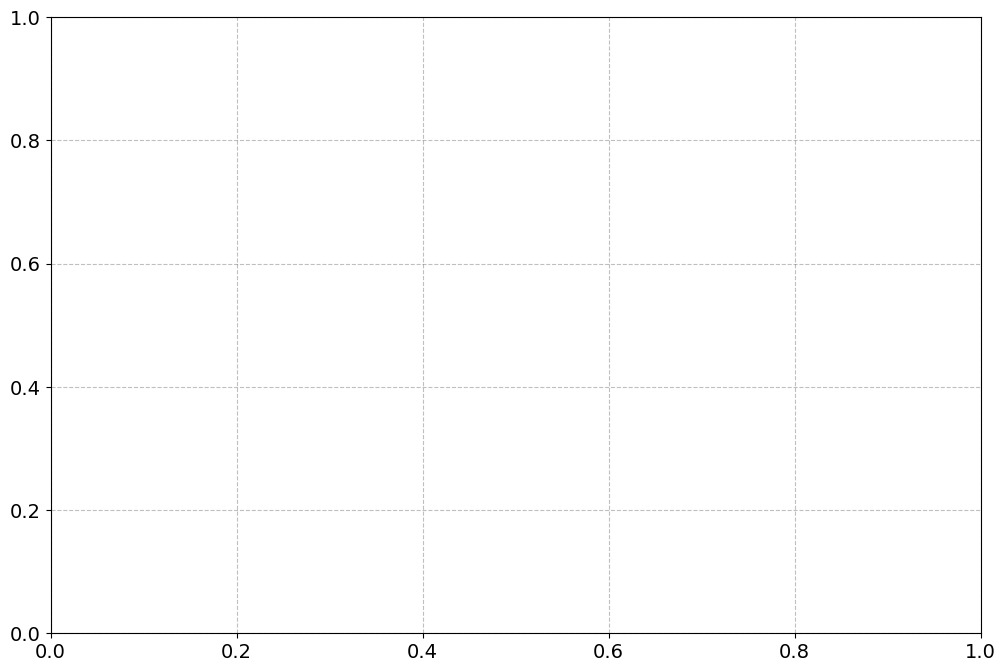

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_euler_distributions(euler_errors, euler_labels, bins=50, xlim=(-5, 5)):
    """
    Given a dict of shape {model_key: array(T, N, 4)}, 
    produces one 1×2 histogram figure per model,
    annotating the mean log10-error in each panel,
    with the x-axis limited between xlim.
    """
    for model_key, errs_all in euler_errors.items():
        fig, axes = plt.subplots(1, 1, figsize=(12, 8))
        axes = axes.flatten()
        
        for i, label in enumerate(euler_labels):
            # select and mask: keep non-zero errors
            errs = errs_all[..., i]
            mask = (~np.isclose(errs, 0.0)) 
            abs_err = np.abs(errs[mask])
            
            # compute log10 and its mean
            log10_err = np.log10(abs_err)
            mean_log10 = log10_err.mean()
            
            # plot histogram
            axes[i].hist(log10_err, bins=bins, edgecolor='black', alpha=0.7)
            axes[i].axvline(mean_log10, color='red', linestyle='--', linewidth=2)
            axes[i].set_xlim(xlim)
            
            # annotate mean
            axes[i].text(
                0.05, 0.95,
                f"Mean: {mean_log10:.2f}",
                transform=axes[i].transAxes,
                verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
            )
            
            # labels and title
            axes[i].set_title(f"{model_key}\n{label}")
            axes[i].set_xlabel('log10(|Euler Error|)')
            axes[i].set_ylabel('Frequency')
        
        #plt.suptitle(f"Euler-Error Distributions for {model_key}", y=1.02, fontsize=16)
        plt.tight_layout()
        plt.show()

    

euler_labels = [
    "Consumption Euler Error",
    "Labor Euler Error"
]

plot_euler_distributions(euler_errors, euler_labels)

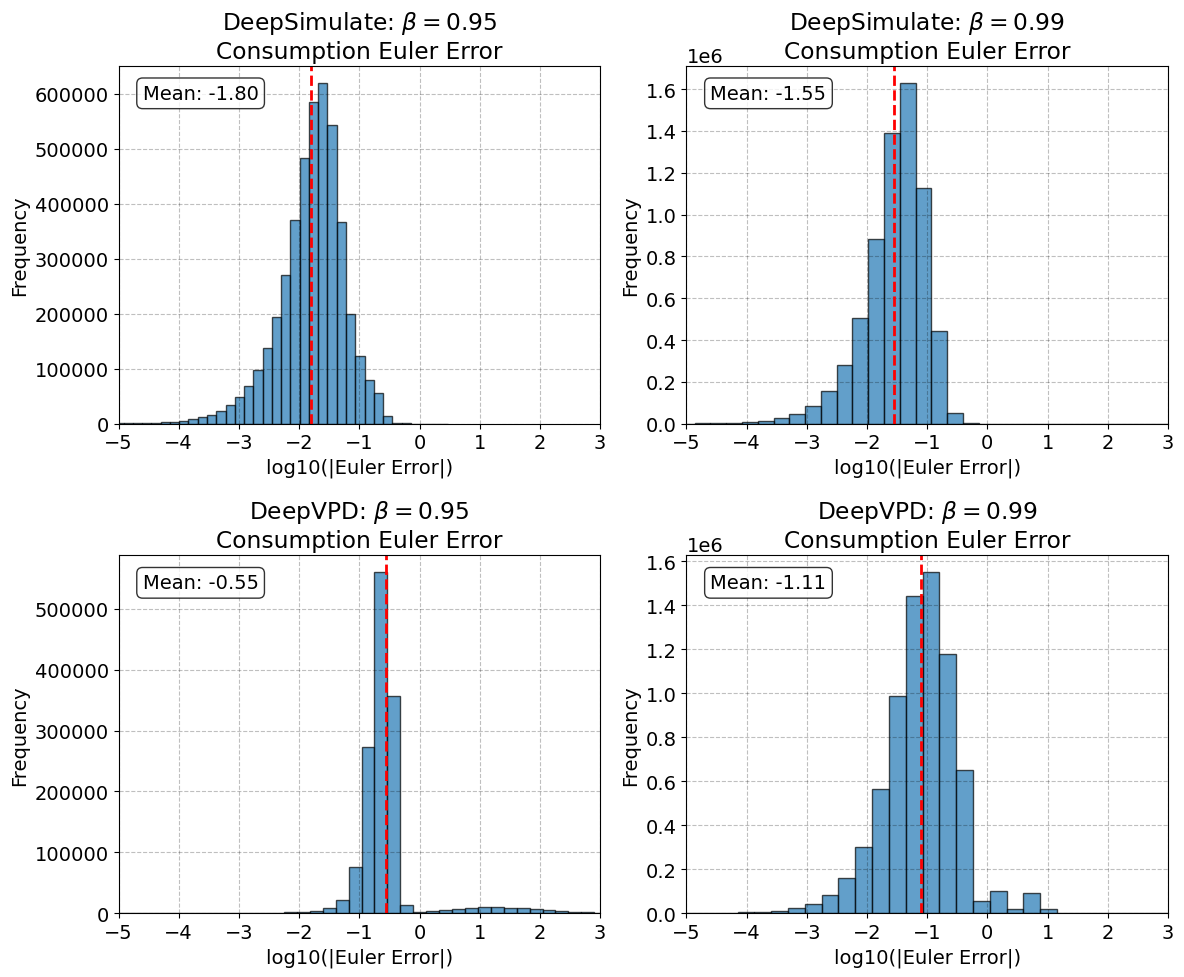

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def plot_euler_distributions(euler_errors, euler_labels, bins=50, xlim=(-5, 3)):
    """
    Given a dict of shape {model_key: array(T, N, 4)}, 
    produces a single 2x2 histogram figure for the consumption Euler error,
    annotating the mean log10-error in each panel.
    """
    # index of the consumption Euler error
    i = 0
    
    # Prepare 2x2 plot grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    axes = axes.flatten()  # flatten to loop through 1D

    for ax, (model_key, errs_all) in zip(axes, euler_errors.items()):
        # select and mask: keep non-zero errors
        errs = errs_all[..., i]
        mask = (~np.isclose(errs, 0.0)) 
        abs_err = np.abs(errs[mask])

        # compute log10 and its mean
        log10_err = np.log10(abs_err)
        mean_log10 = log10_err.mean()

        # plot histogram
        ax.hist(log10_err, bins=bins, edgecolor='black', alpha=0.7)
        ax.axvline(mean_log10, color='red', linestyle='--', linewidth=2)
        ax.set_xlim(xlim)

        # annotate mean
        ax.text(
            0.05, 0.95,
            f"Mean: {mean_log10:.2f}",
            transform=ax.transAxes,
            verticalalignment='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8)
        )

        # labels and title
        ax.set_title(f"{model_key}\n{euler_labels[i]}")
        ax.set_xlabel('log10(|Euler Error|)')
        ax.set_ylabel('Frequency')
    plt.tight_layout()
    plt.savefig("euler_errors_consumption.png", dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
euler_labels = [
    "Consumption Euler Error"
]

plot_euler_distributions(euler_errors, euler_labels)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

states_high = model_DL[r'DeepSimulate: $\beta = 0.99$'].sim.states.cpu().numpy()
states_low = model_DL[r'DeepSimulate: $\beta = 0.95$'].sim.states.cpu().numpy()


# Extract variables from states and outcomes
housing_high = outcomes_high[:, :, 1]
funds_high   = outcomes_high[:, :, 3]
bonds_high   = outcomes_high[:, :, 4]
equity_high  = outcomes_high[:, :, 5]
wage_high    = states_high[:, :, 0]
money_high   = states_high[:, :, 1]
debt_high    = states_high[:, :, 2]

housing_low = outcomes_low[:, :, 1]
funds_low   = outcomes_low[:, :, 3]
bonds_low   = outcomes_low[:, :, 4]
equity_low  = outcomes_low[:, :, 5]
wage_low    = states_low[:, :, 0]
money_low   = states_low[:, :, 1]
debt_low    = states_low[:, :, 2]

# Age group bins (T = 75, starts at 18 → ages 18 to 93)
age_bins = {
    "18–34": np.arange(0, 17),
    "35–49": np.arange(17, 32),
    "50–64": np.arange(32, 47),
    "65–74": np.arange(47, 57),
    "75–84": np.arange(57, 67),
    "85+":   np.arange(67, 75)
}
labels = list(age_bins.keys())

def bin_data(var, bins):
    return [var[bins[label]].flatten() for label in labels]

# Bin each variable
data_high = [
    bin_data(housing_high, age_bins),
    bin_data(funds_high, age_bins),
    bin_data(bonds_high, age_bins),
    bin_data(equity_high, age_bins),
    bin_data(wage_high, age_bins),
    bin_data(money_high, age_bins),
    bin_data(debt_high, age_bins),
]

data_low = [
    bin_data(housing_low, age_bins),
    bin_data(funds_low, age_bins),
    bin_data(bonds_low, age_bins),
    bin_data(equity_low, age_bins),
    bin_data(wage_low, age_bins),
    bin_data(money_low, age_bins),
    bin_data(debt_low, age_bins),
]

titles = ["House Holdings", "Funds", "Bonds", "Equity", "Wages", "Money Holdings", "Debt"]

# Plot
fig, axs = plt.subplots(3, 3, figsize=(18, 12))
axs = axs.flatten()
colors = ["#ff9999", "#66b3ff"]  # High and low beta colors

positions_high = np.arange(len(labels)) - 0.2
positions_low  = np.arange(len(labels)) + 0.2

for i, ax in enumerate(axs[:len(titles)]):
    bp_high = ax.boxplot(data_high[i], positions=positions_high, widths=0.35, patch_artist=True,
                         boxprops=dict(facecolor=colors[0], alpha=0.6), tick_labels=labels)
    bp_low = ax.boxplot(data_low[i], positions=positions_low, widths=0.35, patch_artist=True,
                        boxprops=dict(facecolor=colors[1], alpha=0.6), tick_labels=[""] * len(labels))

    ax.set_title(titles[i])
    ax.set_xticks(np.arange(len(labels)))
    ax.set_xticklabels(labels, rotation=45)
    if i % 3 == 0:
        ax.set_ylabel("Level")
    ax.legend([bp_high["boxes"][0], bp_low["boxes"][0]],
              [r"$\beta = 0.99$", r"$\beta = 0.95$"], loc="upper right")

# Hide empty subplots if fewer than 9
for j in range(len(titles), 9):
    axs[j].axis('off')

plt.tight_layout()
plt.savefig("Boxplot_all_variables_age_groups_Households_TARGET_INFLATION.png", dpi=300)
plt.show()
